# Import Stataments

In [24]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
# sentiment analysis 

import warnings
warnings.filterwarnings('ignore')
import re
#from wordcloud import WordCloud, STOPWORDS
#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo

from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

## Converting Json files to Dataframe

###### Review file

In [2]:
#since pd.readjson will cause memeory error, we read the file line by line
path = '../data/input_json_files/yelp_academic_dataset_review.json'
review = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        review.append(line_contents)

In [3]:
review = pd.DataFrame(review)
review.shape

(6990280, 9)

In [4]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


###### Business file

In [8]:
#since pd.readjson will cause memeory error, we read the file line by line
path = '../data/input_json_files/yelp_academic_dataset_business.json'
business = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        business.append(line_contents)

In [9]:
business = pd.DataFrame(business)
business.shape

(150346, 14)

In [10]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Data Cleaning

In [12]:
#Dropping unnecessary columns in review file.
review = review.drop(['text','useful','cool', 'date', 'funny'], axis = 1)
review.head()

,review_id,user_id,business_id,stars
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0


In [41]:
review.to_csv('../data/output_csv/review.csv',index = False)

In [16]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [18]:
# Recommendations will be valid only if the business is still open
# 1 = open, 0 = closed
business = business[business['is_open']==1]

In [19]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      12348
categories         95
hours           16095
dtype: int64

In [20]:
# let remove the rows for which categories are not mentioned
business.dropna(subset=['categories'], inplace=True)

In [21]:
business.shape

(119603, 14)

Text(0.5, 1.0, 'North America Region')

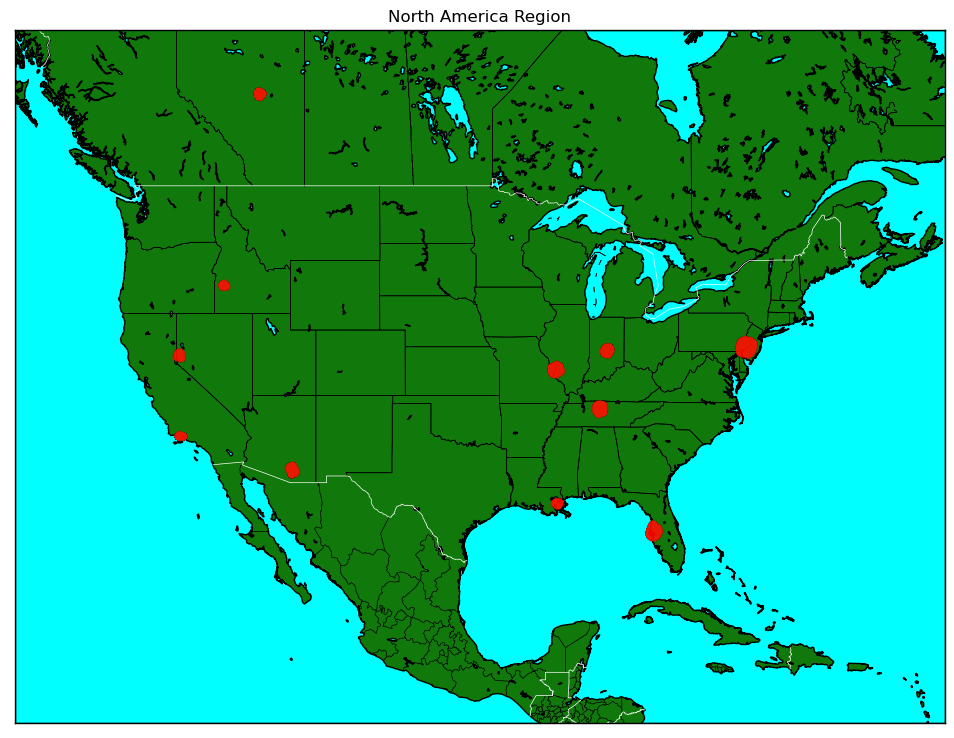

In [26]:
# Sample it down to only the North America region 
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (business["longitude"]>lon_min) &\
            (business["longitude"]<lon_max) &\
            (business["latitude"]>lat_min) &\
            (business["latitude"]<lat_max)

#apply the selector to subset
business=business[idx_NA]

#initiate the figure
plt.figure(figsize=(12,15))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.drawcoastlines()
m2.drawmapboundary(fill_color='aqua')                # aqua background
m2.fillcontinents(color='#11780C',lake_color='aqua')  # dark green land, aqua lakes
m2.drawstates(linewidth=0.5, color="black")
m2.drawcountries(linewidth=0.5, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(business["longitude"].tolist(), business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=30, c="#FB1903", lw=0, alpha=0.05, zorder =20)

plt.title("North America Region")

In [27]:
business.shape

(119603, 14)

In [40]:
business.to_csv('../data/output_csv/business.csv',index = False)

In [28]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,34987
1,Food,20419
2,Shopping,20186
3,Home Services,13322
4,Beauty & Spas,12263
...,...,...
1297,Guamanian,1
1298,Cheese Tasting Classes,1
1299,Bike Repair,1
1300,Tonkatsu,1


In [29]:
cat= cat.sort_values(by = 'Count', ascending = False)

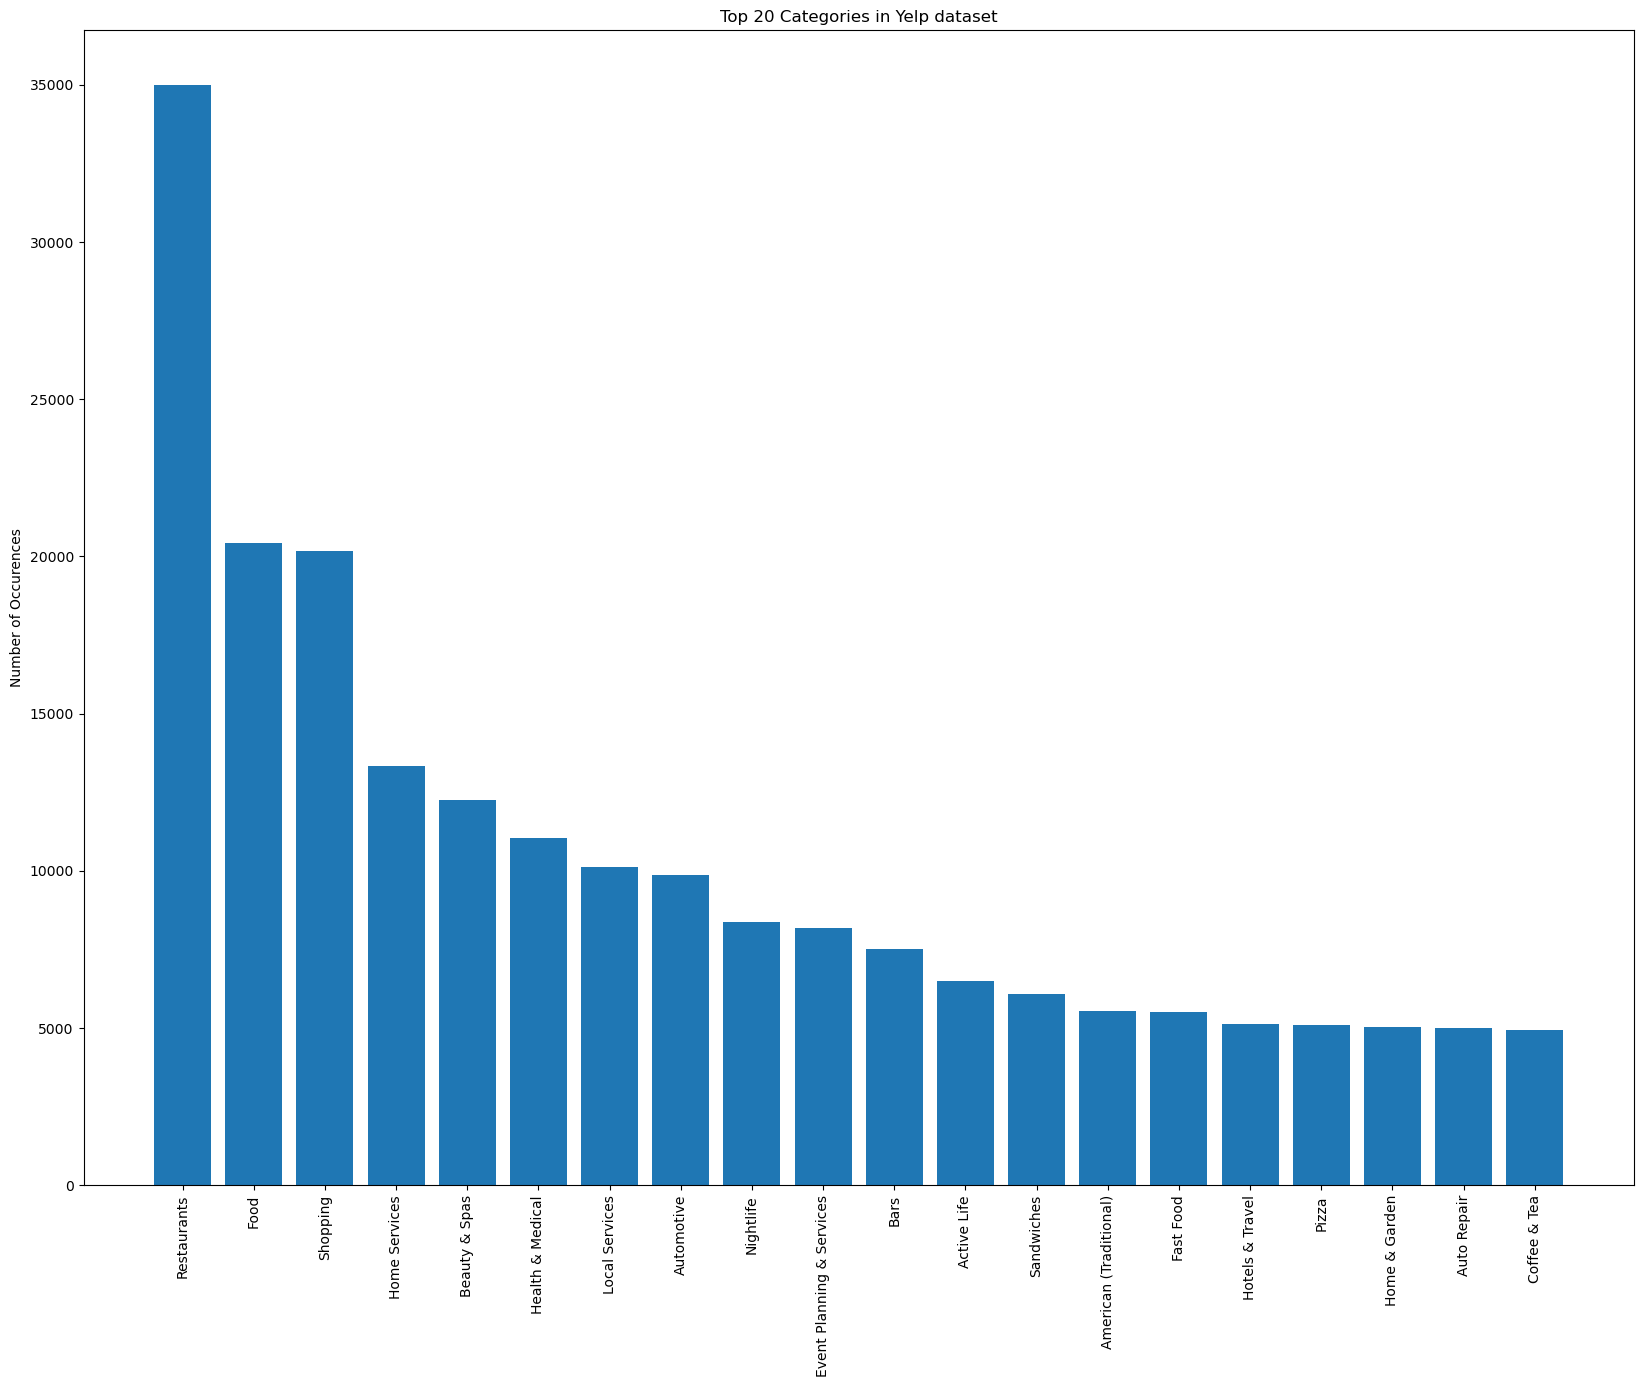

In [30]:
cat = cat[0:20]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Number of Occurences')
plt.title('Top 20 Categories in Yelp dataset')
plt.show()

In [32]:
b = pd.DataFrame()
food_category_filter = ['Restaurants' , 'Food' , 'Bars' , 'Sandwiches' , 'Fast Food','Pizza' , 'Coffee & Tea']

In [38]:
for index, row in business.categories.items():
    for i in range(len(food_category_filter)):
        try:
            if food_category_filter[i] in row:
                b = b.append(business.iloc[index])
                break
        except:
            print(index)
            print(business.iloc[index])

7859
business_id                                WyclCXG8IoiolTr2ugLbig
name                                                 CVS Pharmacy
address                                           1000 Kresson Rd
city                                                     Voorhees
state                                                          NJ
postal_code                                                 08043
latitude                                                39.867175
longitude                                                -74.9425
stars                                                         3.0
review_count                                                    6
is_open                                                         1
attributes      {'BusinessParking': '{'garage': False, 'street...
categories      Pharmacy, Convenience Stores, Shopping, Drugst...
hours           {'Monday': '8:0-22:0', 'Tuesday': '10:0-20:0',...
Name: 9879, dtype: object
9283
business_id                             

10779
business_id                                WWs1xspH1d-NCIWmXM40RQ
name                                          Nothing Bundt Cakes
address                                       4110 N Mt Juliet Rd
city                                                    Mt Juliet
state                                                          TN
postal_code                                                 37122
latitude                                                 36.22783
longitude                                               -86.51465
stars                                                         3.5
review_count                                                   12
is_open                                                         1
attributes      {'BusinessAcceptsCreditCards': 'True', 'Restau...
categories                     Cupcakes, Bakeries, Food, Desserts
hours           {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...
Name: 13541, dtype: object
10790
business_id                          

KeyboardInterrupt: 

In [ ]:
bus = b
bus["attributes"][1]

In [ ]:
bus

#### Now we shall see the distribution of state in this dataset


In [ ]:
state_count = bus.state.value_counts()

In [ ]:
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

In [ ]:
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()

##### From this, graph, we see the statewise distribution of restaurants. As we can see, this data consists of restaurants present all over the world. For the sake of simplicity, we will focus on the restaurants present in Pennsylvania.

In [ ]:
business_in_PA = bus[bus.state == 'PA']

In [ ]:
business_in_PA = business_in_PA.reset_index(drop = True)

In [ ]:
business_in_PA